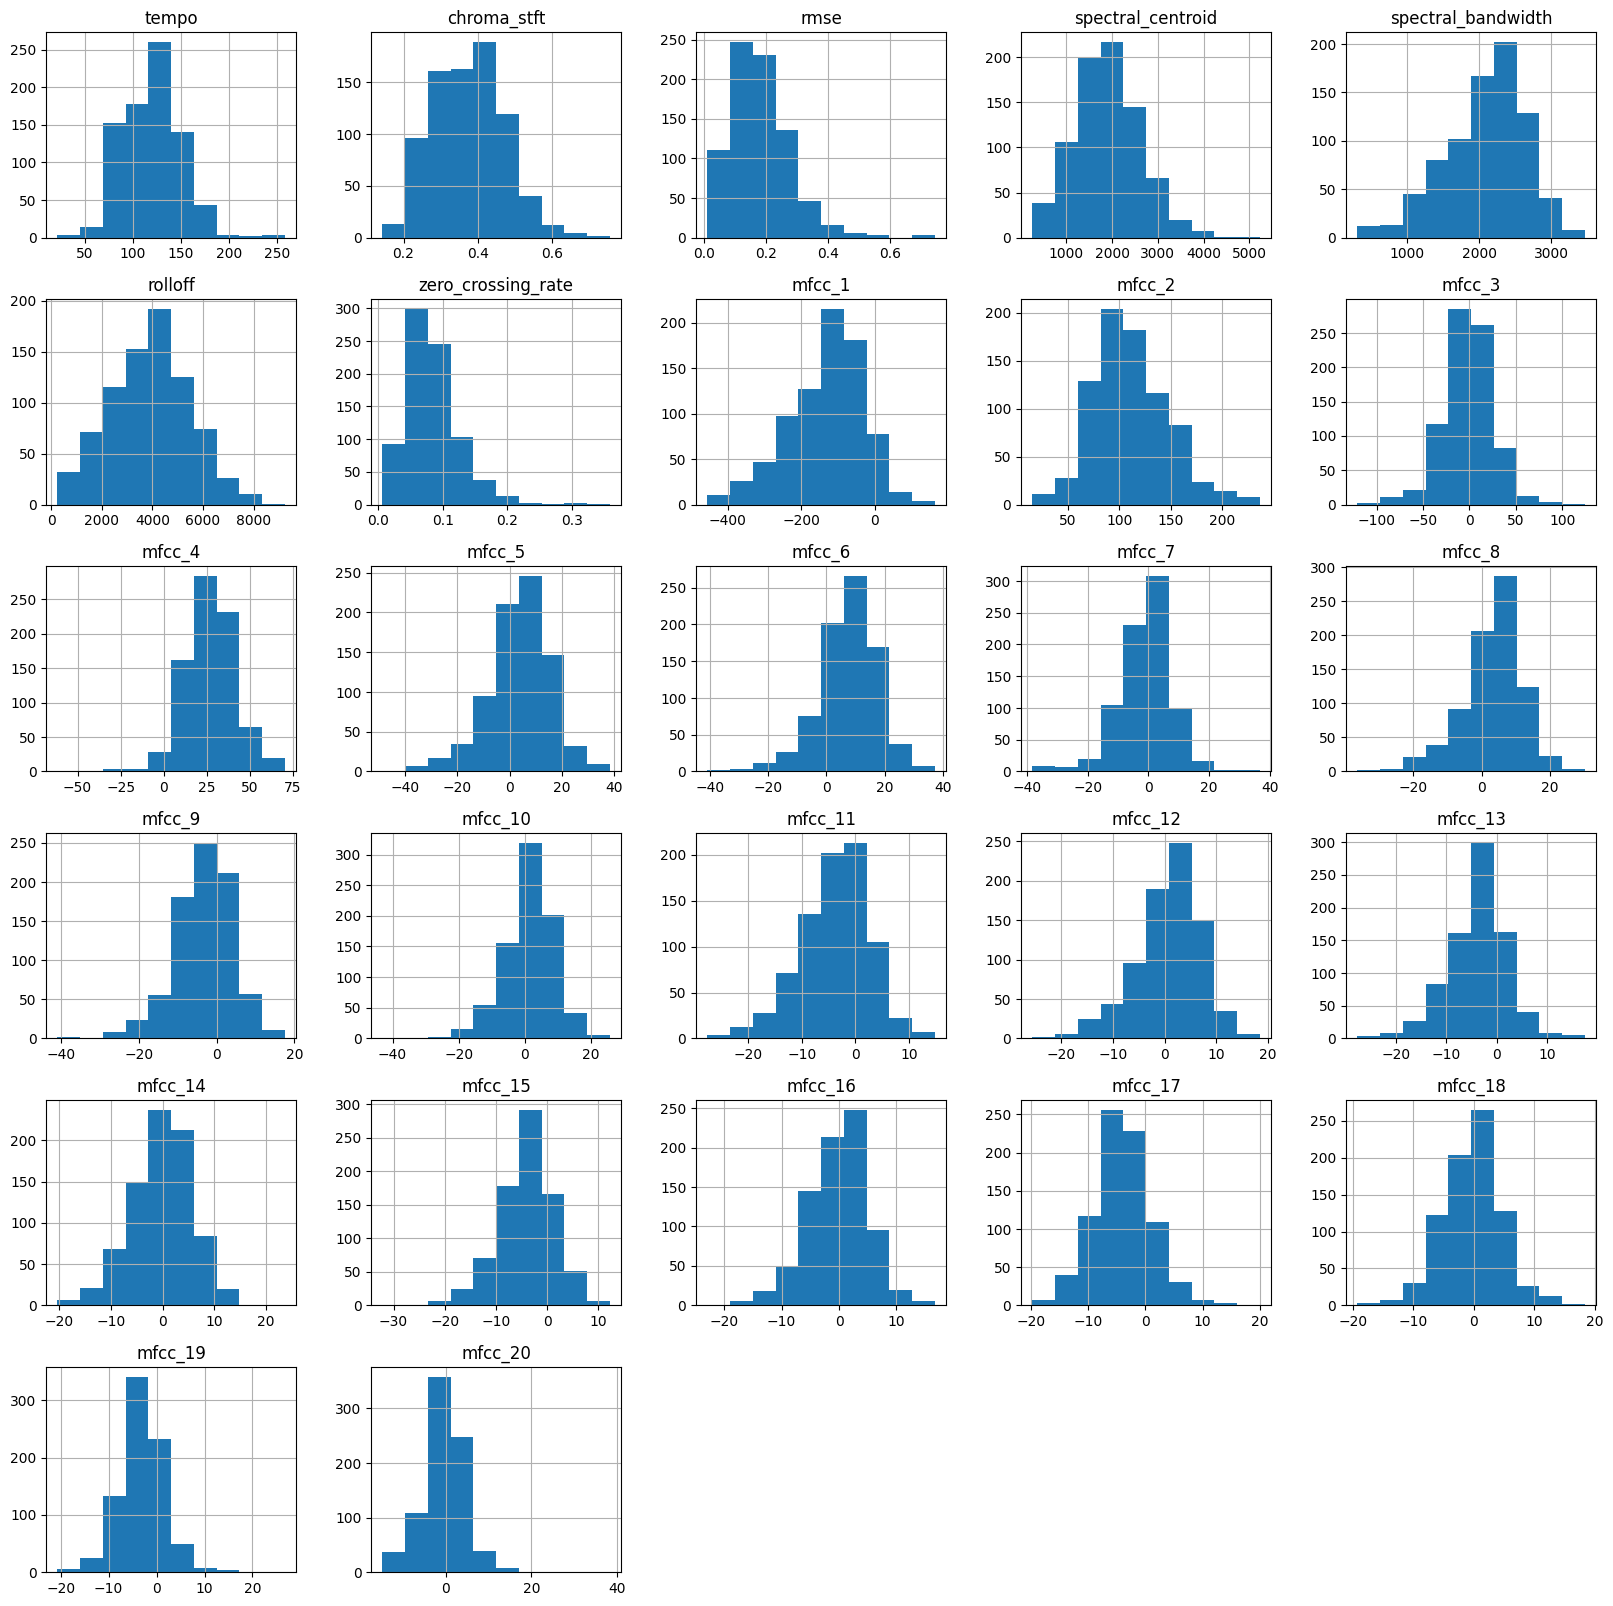

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dataset = pd.read_csv(r'D:\MMC-Project\song-recommender\backend\song_features.csv')

dataset = dataset.sample(frac=0.1, random_state = 1)

dataset.hist(figsize = (20, 20))
plt.show()

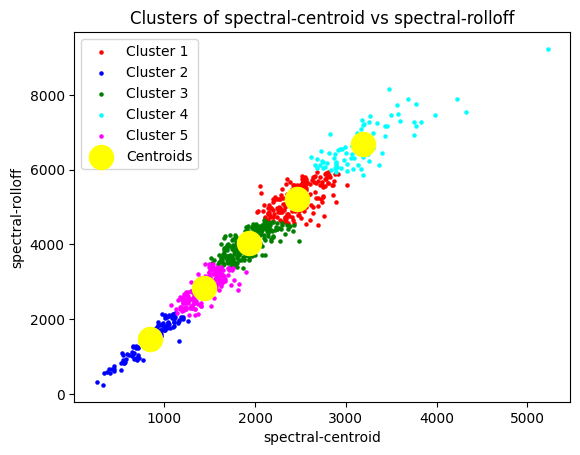

In [58]:
X = dataset.iloc[:, [3,5]].values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 5, c = 'magenta', label = 'Cluster 5'),
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of spectral-centroid vs spectral-rolloff')
plt.xlabel('spectral-centroid')
plt.ylabel('spectral-rolloff')
plt.legend()
plt.show()

<Axes: title={'center': 'Distribution of songs across clusters'}>

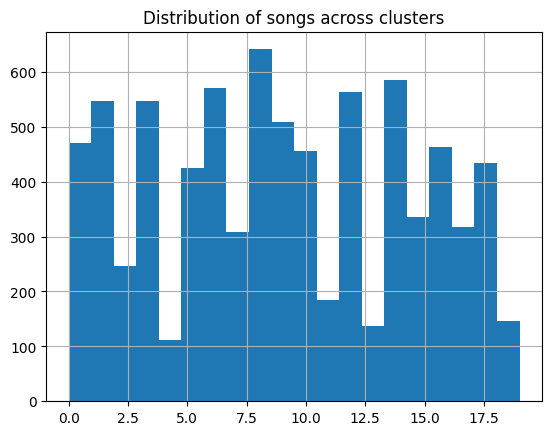

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv(r'D:\MMC-Project\song-recommender\backend\song_features.csv')

# Normalize the features to have mean 0 and variance 1
scaler = StandardScaler()
features = df.drop(['song'], axis=1)  # assuming 'song' is the column with song identifiers
normalized_features = scaler.fit_transform(features)

# Train a KMeans clustering model
kmeans = KMeans(n_clusters=20, random_state=42)  # the number of clusters can be adjusted
kmeans.fit(normalized_features)

# Predict clusters for each song (which serves as a simple recommendation system)
df['cluster'] = kmeans.predict(normalized_features)

# plot the distribution of songs across clusters
plt.title('Distribution of songs across clusters')
df['cluster'].hist(bins=20)
